In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


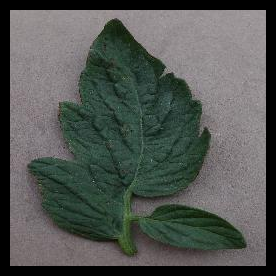

In [3]:
from google.colab import drive
drive.mount('/content/drive')

import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Use cv2_imshow for displaying images in Colab

# Define the path to your image in Google Drive
image_path = '/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Tomato_Train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Get the dimensions of the image
height, width, _ = image.shape

# Define the border width (adjust this according to your needs)
border_width = 10

# Create a black border around the image
bordered_image = cv2.copyMakeBorder(image, border_width, border_width, border_width, border_width, cv2.BORDER_CONSTANT, value=(0, 0, 0))

# Show the image with the border using cv2_imshow
cv2_imshow(bordered_image)


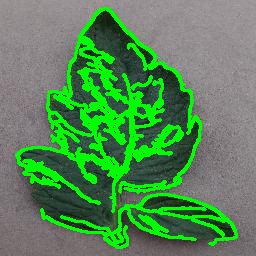

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Define the path to your image in Google Drive
image_path = '/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Tomato_Train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG'

# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw a green border along the edge of the leaf
bordered_image = image.copy()
cv2.drawContours(bordered_image, contours, -1, (0, 255, 0), thickness=2)

# Show the image with the border using cv2_imshow
cv2_imshow(bordered_image)

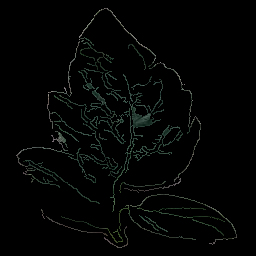

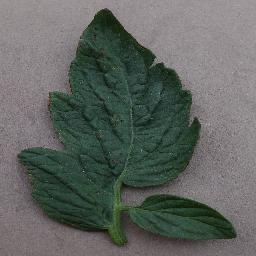

In [15]:
# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black mask image with the same dimensions as the original image
mask = np.zeros_like(image)

# Draw the outermost contour (the leaf) on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Apply the mask to the original image
result = cv2.bitwise_and(image, mask)

# Show the result using cv2_imshow
cv2_imshow(result)


# Check if there are any contours detected
if len(contours) > 0:
    # Get the outermost contour (the largest area contour)
    outer_contour = max(contours, key=cv2.contourArea)

    # Create a black mask image with the same dimensions as the original image
    mask = np.zeros_like(image)

    # Draw the outermost contour on the mask
    cv2.drawContours(mask, [outer_contour], -1, (255, 255, 255), thickness=cv2.FILLED)

    # Apply the mask to the original image
    result = cv2.bitwise_and(image, mask)

    # Extract the pixel values of the outermost contour from the original image
    outermost_contour_pixels = image.copy()
    for point in outer_contour:
        x, y = point[0]
        pixel_value = image[y, x]  # Note the y, x order for indexing
        outermost_contour_pixels[y, x] = pixel_value

    # Show the result using cv2_imshow
    cv2_imshow(outermost_contour_pixels)

# If no contours were found, you can handle that case accordingly
else:
    print("No contours found in the image.")

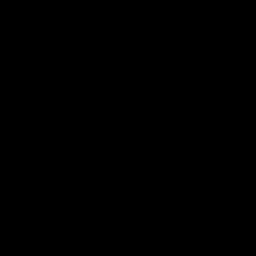

In [6]:
# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black mask image with the same dimensions as the original image
mask = np.zeros_like(image)

# Draw the outermost contour (the leaf) on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Map the original image onto the masked region
result = cv2.bitwise_and(image, mask)

# Convert the result to grayscale
result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary mask
_, binary_mask = cv2.threshold(result_gray, 1, 255, cv2.THRESH_BINARY)

# Invert the binary mask
inverted_mask = cv2.bitwise_not(binary_mask)

# Apply the inverted mask to the result to show only the inside part of the leaf
inside_leaf = cv2.bitwise_and(result, result, mask=inverted_mask)

# Show the inside part of the leaf
cv2_imshow(inside_leaf)

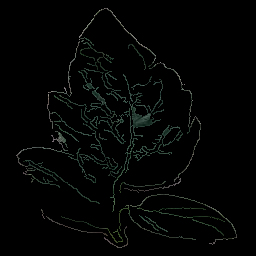

In [7]:
# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black mask image with the same dimensions as the original image
mask = np.zeros_like(image)

# Draw the outermost contour (the leaf) on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Map the original image onto the masked region
result = cv2.bitwise_and(image, mask)

# Show the result using cv2_imshow
cv2_imshow(result)

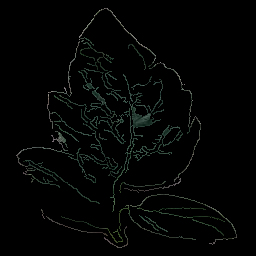

In [8]:
# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black mask image with the same dimensions as the original image
mask = np.zeros_like(image)

# Draw the outermost contour (the leaf) on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Map the original image onto the masked region
result = cv2.bitwise_and(image, mask)

# Convert the result to grayscale
result_gray = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary mask
_, binary_mask = cv2.threshold(result_gray, 1, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask to extract the inside part of the leaf
inner_contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black mask for the inside part of the leaf
inner_mask = np.zeros_like(image)

# Draw the inner contour on the inner mask
cv2.drawContours(inner_mask, inner_contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Map the original image onto the inner mask to extract the inside part of the leaf
inside_leaf = cv2.bitwise_and(image, inner_mask)

# Show the inside part of the leaf
cv2_imshow(inside_leaf)

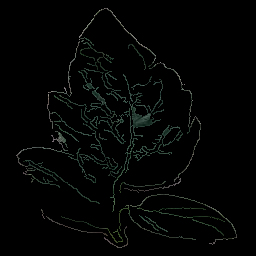

In [13]:
# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a black mask image with the same dimensions as the original image
mask = np.zeros_like(gray, dtype=np.uint8)

# Draw the outermost contour (the leaf) on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Extract the original part of the inside leaf
original_inside_leaf = cv2.bitwise_and(image, image, mask=mask)

# Show the original part of the inside leaf
cv2_imshow(original_inside_leaf)

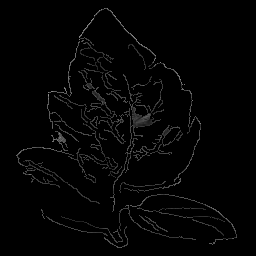

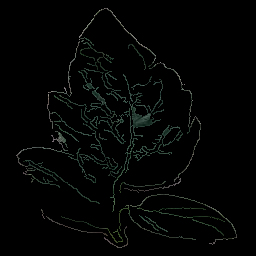

In [14]:
# Load the image using OpenCV
image = cv2.imread(image_path)

# Convert the image to grayscale for edge detection
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve edge detection
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Use Canny edge detection to find edges in the image
edges = cv2.Canny(blurred, threshold1=30, threshold2=100)

# Find contours in the edge-detected image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create an all-black mask image with the same dimensions as the original image
mask = np.zeros_like(gray)

# Draw the outermost contour (the leaf) on the mask
cv2.drawContours(mask, contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Extract the contour pixels by masking the original grayscale image
contour_pixels = cv2.bitwise_and(gray, gray, mask=mask)

# Create a color version of the contour pixels by repeating the grayscale values across channels
color_contour_pixels = cv2.cvtColor(contour_pixels, cv2.COLOR_GRAY2BGR)

# Create a mask for the outside region
outside_mask = cv2.bitwise_not(mask)

# Set the outside region to black in the color_contour_pixels image
color_contour_pixels[outside_mask == 255] = [0, 0, 0]

# Show the color_contour_pixels image with the contour pixels and outside region
cv2_imshow(color_contour_pixels)

# Access the original image pixel values for the contour pixels
original_image_contour_pixels = cv2.bitwise_and(image, image, mask=mask)

# Show the original_image_contour_pixels
cv2_imshow(original_image_contour_pixels)


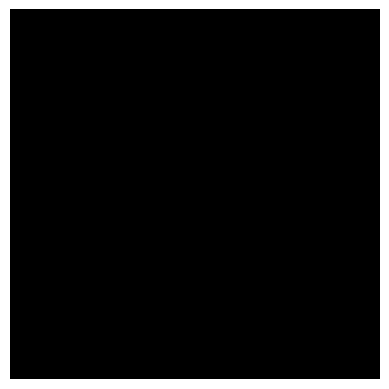

In [16]:
from matplotlib import pyplot as plt
green_mask = np.all(image == [0, 255, 0], axis=-1)

# Replace non-green pixels with (0, 0, 0)
image[~green_mask] = [0, 0, 0]

# Display the modified image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [17]:
from PIL import Image
import numpy as np

# Open the image using PIL
image = Image.open(image_path)

# Convert the image to a NumPy array
pixel_values = np.array(image)

# Display the shape of the NumPy array (height, width, channels)
print("Image Shape:", pixel_values.shape)


Image Shape: (256, 256, 3)


In [22]:
from PIL import Image

# Load an image from file
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Tomato_Train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')

# Access a pixel at row 100 and column 50
pixel = image.getpixel((50, 100))

# Access the Red, Green, and Blue values of the pixel
red = pixel[0]
green = pixel[1]
blue = pixel[2]

# Alternatively, you can use this shorthand notation
red, green, blue = image.getpixel((50, 100))

# Display the pixel values
print(f"Pixel at (50, 100) - Red: {red}, Green: {green}, Blue: {blue}")

Pixel at (50, 100) - Red: 83, Green: 84, Blue: 70


In [23]:
from PIL import Image

# Load an image from file
image = Image.open('/content/drive/MyDrive/Colab Notebooks/Leaf Disease/Tomato_Train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG')

# Initialize variables to store min and max values for each channel
min_red = 255  # Initialize with the maximum possible value
max_red = 0    # Initialize with the minimum possible value
min_green = 255
max_green = 0
min_blue = 255
max_blue = 0

# Get the dimensions of the image
width, height = image.size

# Iterate through each pixel in the image
for y in range(height):
    for x in range(width):
        pixel = image.getpixel((x, y))

        # Extract Red, Green, and Blue values
        red, green, blue = pixel

        # Update min and max values for each channel
        if red < min_red:
            min_red = red
        if red > max_red:
            max_red = red

        if green < min_green:
            min_green = green
        if green > max_green:
            max_green = green

        if blue < min_blue:
            min_blue = blue
        if blue > max_blue:
            max_blue = blue

# Display the range of pixel values for each channel
print(f"Red Channel Range:   {min_red} - {max_red}")
print(f"Green Channel Range: {min_green} - {max_green}")
print(f"Blue Channel Range:  {min_blue} - {max_blue}")


Red Channel Range:   2 - 176
Green Channel Range: 10 - 178
Blue Channel Range:  0 - 172


In [26]:

from PIL import Image, ImageDraw
# Create a new image with the same dimensions as the original image
highlighted_image = image.copy()

# Create a drawing context on the new image
draw = ImageDraw.Draw(highlighted_image)

# Get the dimensions of the image
width, height = image.size

# Define the criteria for highlighting
green_range = (10, 278)
red_value = 0
blue_value = 0

# Iterate through each pixel in the original image and highlight based on criteria
for y in range(height):
    for x in range(width):
        pixel = image.getpixel((x, y))

        # Extract Red, Green, and Blue values
        red, green, blue = pixel

        # Check if the pixel meets the criteria
        if green_range[0] <= green <= green_range[1] and red == red_value and blue == blue_value:
            # Highlight the pixel in the new image
            draw.point((x, y), fill=(255, 0, 0))  # Highlight in red

# Save or display the highlighted image
highlighted_image.show()

In [27]:
print(image)


<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7ECC1345B8B0>


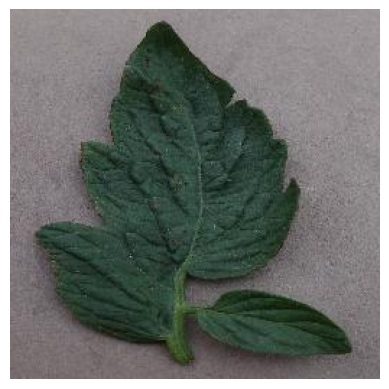

Image Pixel Values (Matrix):
 [[[143 143 149]
  [145 145 151]
  [147 147 153]
  ...
  [155 153 159]
  [153 151 157]
  [152 150 156]]

 [[146 146 152]
  [146 146 152]
  [148 148 154]
  ...
  [154 152 158]
  [154 152 158]
  [154 152 158]]

 [[148 148 154]
  [148 148 154]
  [148 148 154]
  ...
  [153 151 157]
  [154 152 158]
  [154 152 158]]

 ...

 [[111 110 120]
  [108 107 117]
  [107 106 116]
  ...
  [111 109 115]
  [109 107 113]
  [116 114 120]]

 [[112 111 121]
  [109 108 118]
  [108 107 117]
  ...
  [115 113 119]
  [115 113 119]
  [115 113 119]]

 [[112 111 121]
  [108 107 117]
  [108 107 117]
  ...
  [121 119 125]
  [120 118 124]
  [111 109 115]]]


In [28]:
# Load the image
image = cv2.imread(image_path)

# Display the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Print the pixel values (matrix)
print("Image Pixel Values (Matrix):\n", image)

In [30]:
# Get the size (dimensions) of the image
height, width, channels = image.shape

# Print the image size
print("Image Size (Dimensions):")
print("Height:", height)
print("Width:", width)
print("Number of Channels (e.g., 3 for RGB):", channels)

Image Size (Dimensions):
Height: 256
Width: 256
Number of Channels (e.g., 3 for RGB): 3


In [41]:
# Get the pixel value at position [0, 0, 0]
pixel_value = image[128,128,0]

# Print the pixel value
print("Pixel Value at [0, 0, 0]:", pixel_value)

Pixel Value at [0, 0, 0]: 62


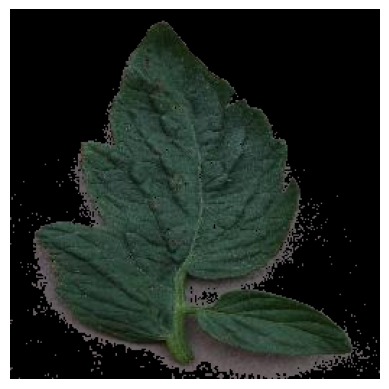

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_path)

# Define the lower and upper bounds of the range
lower_bound = 100
upper_bound = 255

# Iterate through the image and set pixels within the range to black
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        pixel = image[i, j]
        if (pixel >= lower_bound).all() and (pixel <= upper_bound).all():
            image[i, j] = [0, 0, 0]

# Display the modified image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
